In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bokeh

%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 12]

In [2]:
df = pd.read_csv('data.csv')
df.rename(columns={'Win %': 'Total win %'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 23 columns):
id                        2533 non-null int64
Place                     2533 non-null int64
Name                      2533 non-null object
Total games               2533 non-null int64
Total win %               2533 non-null float64
Ambusher games            2533 non-null int64
Ambusher win %            2533 non-null float64
Bruiser games             2533 non-null int64
Bruiser win %             2533 non-null float64
Burst Damage games        2533 non-null int64
Burst Damage win %        2533 non-null float64
Healer games              2533 non-null int64
Healer win %              2533 non-null float64
Siege games               2533 non-null int64
Siege win %               2533 non-null float64
Support games             2533 non-null int64
Support win %             2533 non-null float64
Sustained Damage games    2533 non-null int64
Sustained Damage win %    2533 non-null float64
Ta

Зависимость процента побед от числа игр

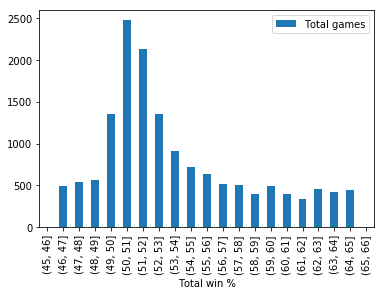

In [3]:
df.groupby(pd.cut(df['Total win %'],np.arange(45,67,1))).agg({'Total games':'median'}).plot.bar()

Узнаем абсолютное число побед

In [4]:
col = list(df.columns)
col.remove('id')
col.remove('Place')
col.remove('Name')
col = set([c.split(' ')[0] for c in col])
col_total = []
col_win = []
col_win_p = []
for c in col:
    cl = c
    if cl in ['Sustained', 'Burst']:
        cl += ' Damage'
    df[cl+' win'] = (df[cl+' games']*df[cl+' win %']/100+0.5).astype(int)
    col_total.append(cl+' games')
    col_win.append(cl+' win')
    col_win_p.append(cl+' win %')
#     df.drop(cl+' win %', inplace=True, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 33 columns):
id                        2533 non-null int64
Place                     2533 non-null int64
Name                      2533 non-null object
Total games               2533 non-null int64
Total win %               2533 non-null float64
Ambusher games            2533 non-null int64
Ambusher win %            2533 non-null float64
Bruiser games             2533 non-null int64
Bruiser win %             2533 non-null float64
Burst Damage games        2533 non-null int64
Burst Damage win %        2533 non-null float64
Healer games              2533 non-null int64
Healer win %              2533 non-null float64
Siege games               2533 non-null int64
Siege win %               2533 non-null float64
Support games             2533 non-null int64
Support win %             2533 non-null float64
Sustained Damage games    2533 non-null int64
Sustained Damage win %    2533 non-null float64
Ta

In [5]:
df.describe()

,id,Place,Total games,Total win %,Ambusher games,Ambusher win %,Bruiser games,Bruiser win %,Burst Damage games,Burst Damage win %,...,Burst Damage win,Tank win,Ambusher win,Support win,Healer win,Siege win,Utility win,Total win,Bruiser win,Sustained Damage win
count,2.533000e+03,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,...,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000
mean,3.587158e+06,1267.000000,1831.280300,52.637663,96.879195,46.437268,206.157916,50.274220,198.783261,49.825069,...,103.568101,159.270430,50.466246,31.332017,175.430320,65.427161,17.086854,953.478089,107.505330,243.409791
std,2.898696e+06,731.358439,1495.581243,1.938765,142.425318,18.299263,229.458554,10.069407,239.708017,11.499445,...,127.650350,176.242372,76.725240,46.965937,205.917389,91.524153,49.275329,768.270738,123.294733,233.206648
min,1.760300e+05,1.000000,302.000000,46.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,0.000000,0.000000
25%,1.248918e+06,634.000000,718.000000,51.300000,14.000000,42.400000,61.000000,47.700000,50.000000,46.900000,...,25.000000,49.000000,7.000000,4.000000,48.000000,11.000000,0.000000,382.000000,30.000000,84.000000
50%,2.634388e+06,1267.000000,1357.000000,52.200000,47.000000,50.000000,138.000000,51.600000,121.000000,51.300000,...,62.000000,104.000000,23.000000,14.000000,111.000000,35.000000,2.000000,712.000000,71.000000,165.000000
75%,5.661721e+06,1900.000000,2479.000000,53.500000,120.000000,55.800000,271.000000,54.700000,258.000000,55.100000,...,133.000000,203.000000,62.000000,39.000000,223.000000,84.000000,15.000000,1278.000000,141.000000,330.000000
max,1.178170e+07,2533.000000,10093.000000,64.300000,1591.000000,100.000000,3580.000000,100.000000,2802.000000,100.000000,...,1564.000000,1804.000000,921.000000,593.000000,1888.000000,1071.000000,959.000000,5168.000000,2098.000000,2101.000000


In [6]:
df.head()

,id,Place,Name,Total games,Total win %,Ambusher games,Ambusher win %,Bruiser games,Bruiser win %,Burst Damage games,...,Burst Damage win,Tank win,Ambusher win,Support win,Healer win,Siege win,Utility win,Total win,Bruiser win,Sustained Damage win
0,7438303,1,KoKirby,448,64.3,97,60.8,1,100.0,140,...,116,24,59,0,47,1,0,288,1,40
1,5692173,2,Zaelia,3646,60.4,448,58.3,215,59.1,785,...,492,172,261,85,251,118,27,2202,127,671
2,735143,3,Cris,5383,57.7,251,54.6,317,54.6,1057,...,641,228,137,52,86,131,69,3106,173,1592
3,192814,4,FNCMene,5377,59.8,325,57.5,186,45.7,1477,...,936,242,187,199,161,285,25,3215,85,1092
4,2971691,5,SonicLeBeast,2647,56.2,527,57.5,184,48.9,541,...,315,15,303,7,134,2,41,1488,90,581


Посмотрим, как распределены величины

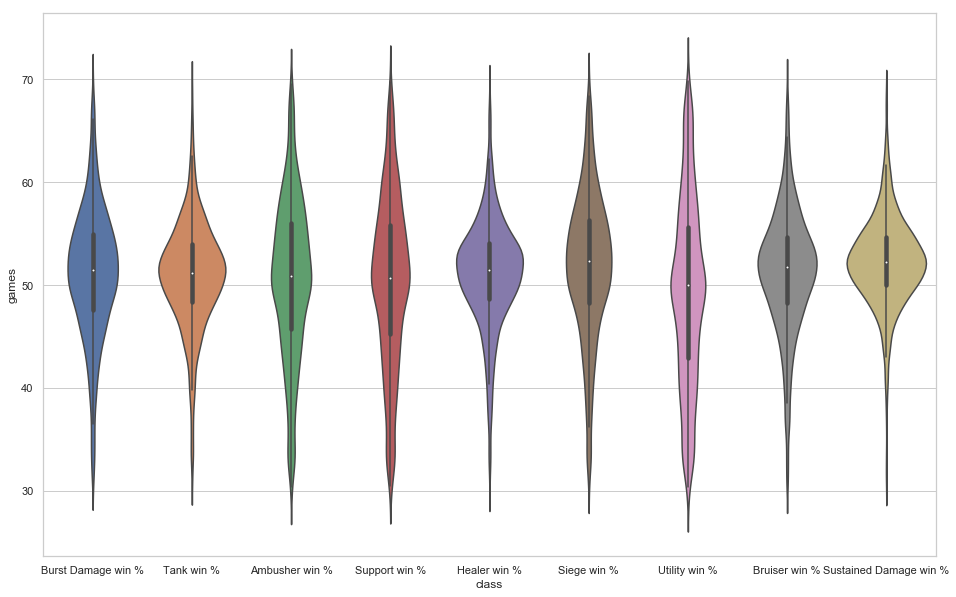

In [16]:
col = col_win_p.copy()
col.remove('Total win %')
df_distribution = df[col].copy()
df_distribution=df_distribution.melt()
df_distribution.columns = ['class','games']
#<30% и >70% там, где очень мало игр, удаляем
df_distribution = df_distribution[df_distribution.games > 30]
df_distribution = df_distribution[df_distribution.games < 70]

from matplotlib import pyplot
dims = (16, 10)
fig, ax = pyplot.subplots(figsize=dims)
sns.set(style="whitegrid")
sns.violinplot(ax=ax,y='games',x='class',data=df_distribution)

Предпочтительный выбор игроков

In [8]:
from bokeh.io import show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.io import output_notebook
from math import pi
output_notebook()

Loading BokehJS ...

In [9]:
col = col_total.copy()
col.remove('Total games')
df_total = df[col].copy()
df_total = pd.DataFrame(df_total.median()).rename(
    index=str, columns={0: 'median'})
df_total['angle'] = df_total['median']/df_total['median'].sum() * 2*pi
df_total['color'] = Category20c[len(col)]
df_total['percent'] = df_total['median']/df_total['median'].sum()*100


p = figure(plot_height=700, title="Prefer classes", toolbar_location=None,
           tools="hover", tooltips="@index: @percent{0.2f} %")

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='index', source=df_total)


p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None


show(p, notebook_handle=True)

Влияние класса на победу

In [10]:
col = col_win.copy()
col.remove('Total win')
df_total = df[col].copy()
df_total = pd.DataFrame(df_total.median()).rename(
    index=str, columns={0: 'median'})
df_total['angle'] = df_total['median']/df_total['median'].sum() * 2*pi
df_total['color'] = Category20c[len(col)]
df_total['percent'] = df_total['median']/df_total['median'].sum()*100


p = figure(plot_height=700, title="Prefer classes", toolbar_location=None,
           tools="hover", tooltips="@index: @percent{0.2f} %")

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='index', source=df_total)


p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None


show(p, notebook_handle=True)

То же, но в древовидной карте

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go

import squarify

x = 0.
y = 0.
width = 100.
height = 100.

values = df_total['median']
names = df_total.index

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ["rgb(215,48,39)","rgb(244,109,67)","rgb(253,174,97)","rgb(254,224,144)",
                "rgb(255,255,191)","rgb(224,243,248)","rgb(171,217,233)","rgb(116,173,209)",
                "rgb(69,117,180)"]
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = names[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

# Without hovertext
# figure = dict(data=[Scatter()], layout=layout)

py.iplot(figure, filename='squarify-treemap')

E:\Anaconda3\envs\ds\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Зависит ли процент побед от процента побед на конкретном классе?

E:\Anaconda3\envs\ds\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



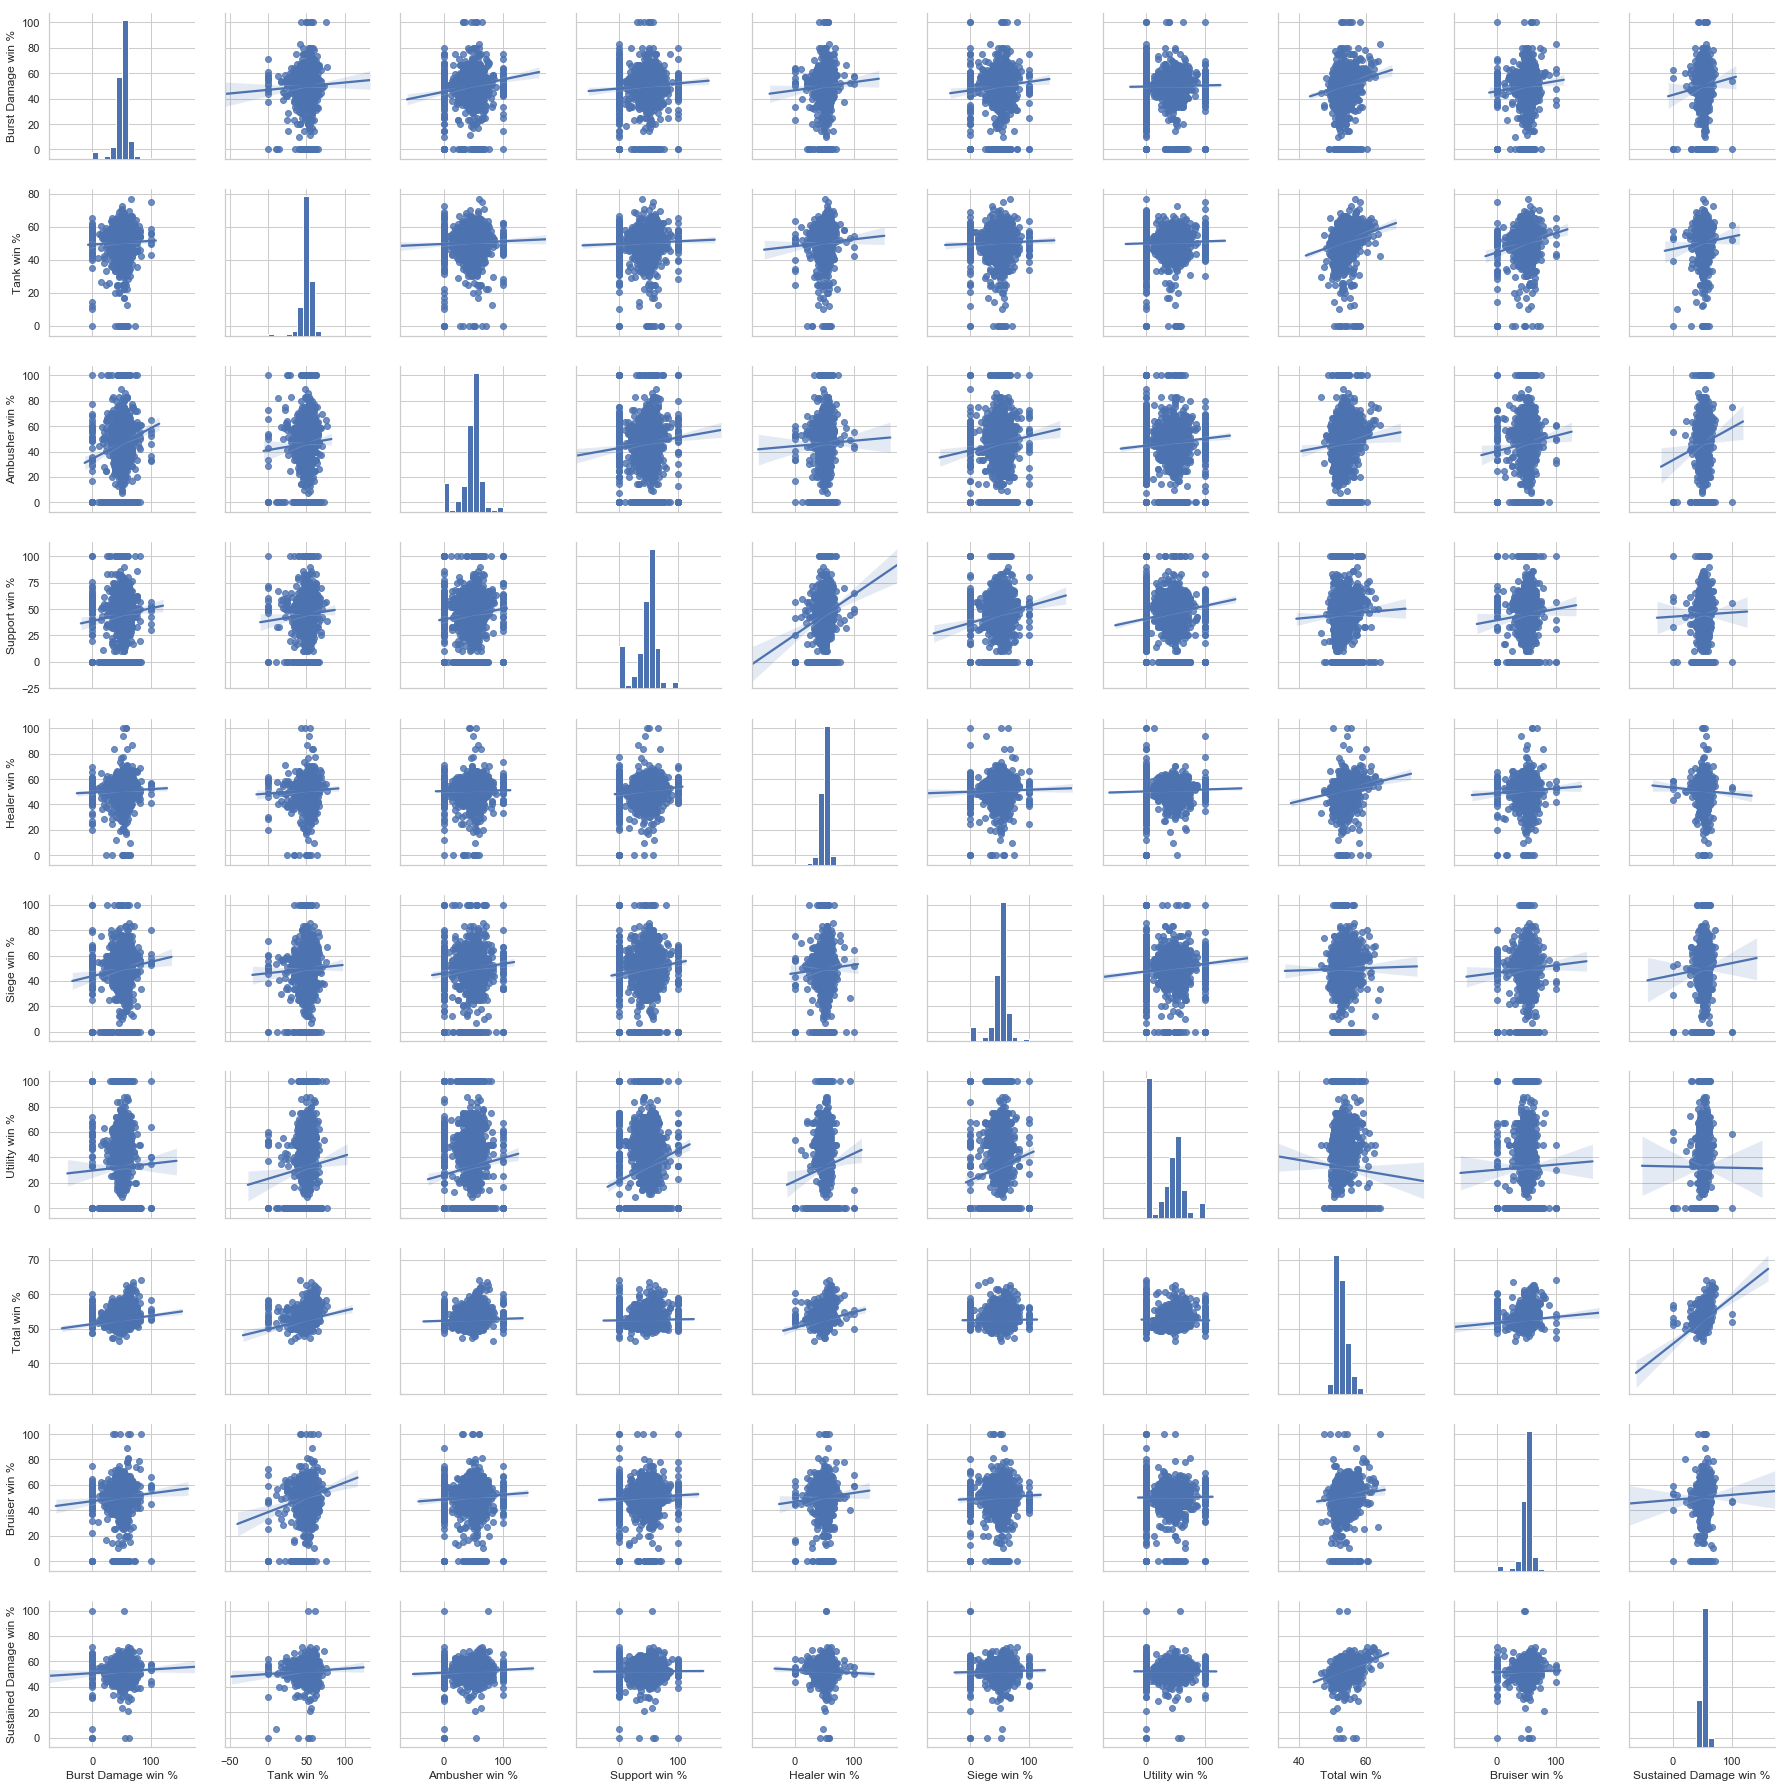

In [12]:
sns.pairplot(df[col_win_p],kind="reg")

Зависит ли процент побед от числа игр на конкретном классе?

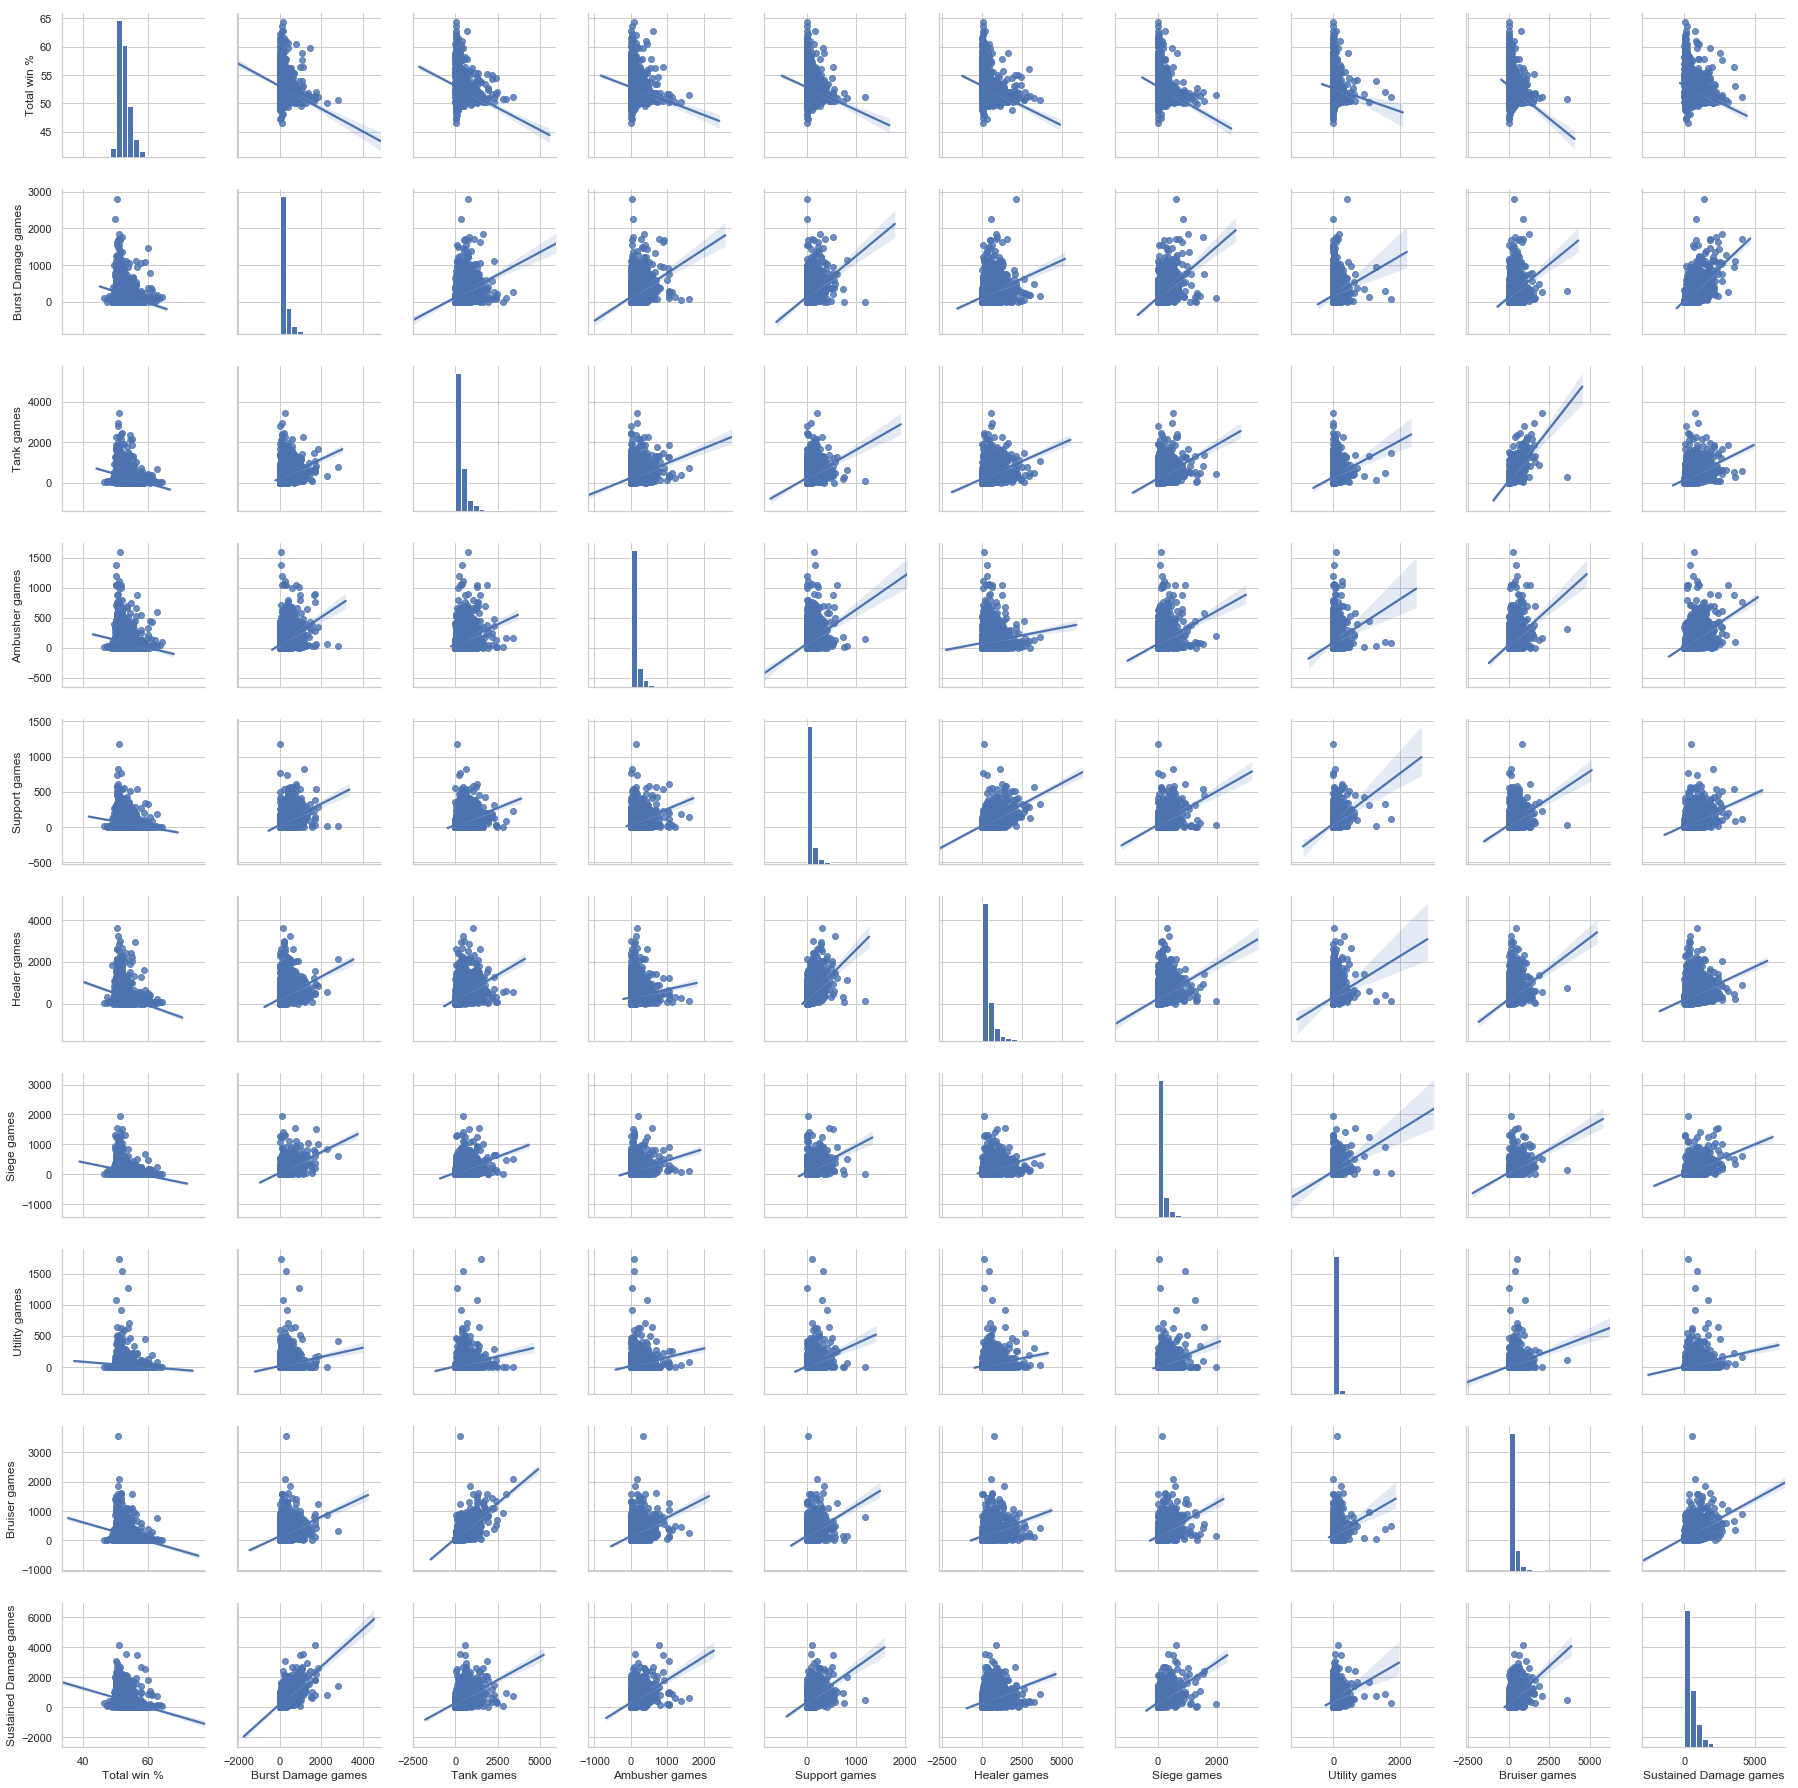

In [13]:
col=['Total win %']
col.extend(col_total)
col.remove('Total games')
sns.pairplot(df[col],kind="reg")

Вывод:

1) Процент побед в среднем не зависит от числа игр. Балансер старается подбирать игроков, равных по уровню при количестве игр -> бесконечности.

2) Классы достаточно сбалансированы на высоком уровне игры. 

3) Наиболее любимые профессиональными игроками 4 класса.